# Business Questions
## Does value investing portfolio outperform ASX200 index? 

In [1]:
# Objectives
# To construct a porfolio based on value investing critieria;
# To examine the relationship between value investing porfolio and ASX 200 index.

In [ ]:
Value investing selection criteria
1. Current ratio >= 1.5
2. Debt to Equity ratio < 0.5
3. Earnings per share has been increasing over the past 5 years
4. Price to earnings ratio < 15
(P/E - based on the average earnings of the past threee years)
5. Price to Book value per share < 1.5

In [184]:
# Importing libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import date

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Importing data
df1 = pd.read_excel('../Financial/finresults (1).xlsx')
df2 = pd.read_excel('../Financial/finresults (2).xlsx')
df3 = pd.read_excel('../Financial/finresults (3).xlsx')
df4 = pd.read_excel('../Financial/advanced.xlsx')

In [4]:
# ASX 200 lists as at June 2020
df5 = pd.read_csv('../Financial/20200601-asx200.csv', skiprows = 1)
df5 = df5[['Code','Company','Sector','Market Cap', 'Weight(%)']]

In [89]:
# Making a copy
df1a = df1.copy()
df2a = df2.copy()
df3a = df3.copy()
df4a = df4.copy()
df5a = df5.copy()

In [88]:
# writing a function to transform the dataset
def transforming(data, var):
    # Identifying str position
    data['new'] = data[var].str.find('-',start=1)+2
    data['new'] = data['new'].astype('int')
    
    # Creating a new column with boolean which contains str
    data["CF"] = data[var].str.contains("Annual Cash Flow")
    cf = data["CF"].sum()
    data["BS"] = data[var].str.contains("Annual Balance Sheet")
    bs = data["BS"].sum()
    data["PL"] = data[var].str.contains("Annual Profit and Loss")
    pl = data["PL"].sum()
    data["market"] = data[var].str.contains("Annual Ratio Analysis")
    market = data["market"].sum()
    
#     print(cf)
#     print(bs)
#     print(pl)
#     print(market)
    
    # Renaming the values
    if cf>0: 
        word_count_cf = int(data.loc[data["CF"]==1, 'new'].mean())
        data.loc[data['CF']==True, var] = data.Item.str.slice(word_count_cf)
#         print(word_count_cf)
    if bs>0: 
        word_count_bs = int(data.loc[data["BS"]==1, 'new'].mean())
        data.loc[data['BS']==True, var] = data.Item.str.slice(word_count_bs)
#         print(word_count_bs)
    if pl>0:
        word_count_pl = int(data.loc[data["PL"]==1, 'new'].mean())
        data.loc[data['PL']==True, var] = data.Item.str.slice(word_count_pl)
#         print(word_count_pl)
    if market>0:
        word_count_market = int(data.loc[data["market"]==1, 'new'].mean())
        data.loc[data['market']==True, var] = data.Item.str.slice(word_count_market)
#         print(word_count_market)



In [91]:
# transforming the data including BS, PL, CF, market information
transforming(df1a, 'Item')
transforming(df2a, 'Item')
transforming(df3a, 'Item')

In [95]:
# saving each file under different year
# df1a
for i in range(2010,2021):
    locals()['df1a_{0}'.format(i)] = df1a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df1a_{0}'.format(i)]['year'] = i
    print('df1a_'+str(i))
# df2a
for i in range(2010,2021):
    locals()['df2a_{0}'.format(i)] = df2a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df2a_{0}'.format(i)]['year'] = i
    print('df2a_'+str(i))
# df3a
for i in range(2010,2021):
    locals()['df3a_{0}'.format(i)] = df3a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df3a_{0}'.format(i)]['year'] = i
    print('df3a_'+str(i))


df1a_2010
df1a_2011
df1a_2012
df1a_2013
df1a_2014
df1a_2015
df1a_2016
df1a_2017
df1a_2018
df1a_2019
df1a_2020
df2a_2010
df2a_2011
df2a_2012
df2a_2013
df2a_2014
df2a_2015
df2a_2016
df2a_2017
df2a_2018
df2a_2019
df2a_2020
df3a_2010
df3a_2011
df3a_2012
df3a_2013
df3a_2014
df3a_2015
df3a_2016
df3a_2017
df3a_2018
df3a_2019
df3a_2020


In [108]:
# appeding all the files
#df1a 
balance_sheet = df1a_2010.append([df1a_2011,
                                  df1a_2012,
                                  df1a_2013,
                                  df1a_2014,
                                  df1a_2015,
                                  df1a_2016,
                                  df1a_2017,
                                  df1a_2018,
                                  df1a_2019,
                                  df1a_2020])
#df2a 
income_statement = df2a_2010.append([df2a_2011,
                                  df2a_2012,
                                  df2a_2013,
                                  df2a_2014,
                                  df2a_2015,
                                  df2a_2016,
                                  df2a_2017,
                                  df2a_2018,
                                  df2a_2019,
                                  df2a_2020])
#df3a 
cash_flow = df3a_2010.append([df3a_2011,
                              df3a_2012,
                              df3a_2013,
                              df3a_2014,
                              df3a_2015,
                              df3a_2016,
                              df3a_2017,
                              df3a_2018,
                              df3a_2019,
                              df3a_2020])

# Merging data

In [541]:
financial = cash_flow.merge(balance_sheet, how='left', on=['ASX Code','year'])
financial = financial.merge(income_statement, how='left', on=['ASX Code','year'])
financial = financial.merge(df4a, how='left', on=['ASX Code'])

In [542]:
# only keeping ASX 200 firms based on June 2021 list
fin_asx200 = financial.merge(df5a, left_on='ASX Code', right_on='Code', 
                            validate="m:1")

In [543]:
keeping_list = ['ASX Code','Year End Share Price ($)','year',
               'Total Curr. Liabilities','Total Current Assets',
               'Total Equity','Total Liabilities',
               'Reported NPAT After Abnorma','Weighted Average Number of',
               'Company Name','GICS Sector','GICS Industry Group',
               'GICS Industry','Market Cap.($)']

In [544]:
fin_asx200_clean = fin_asx200[keeping_list]
fin_asx200_clean.head(2)

,ASX Code,Year End Share Price ($),year,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,Reported NPAT After Abnorma,Weighted Average Number of,Company Name,GICS Sector,GICS Industry Group,GICS Industry,Market Cap.($)
0,A2M,,2010,,,,,,,The a2 Milk Company Limited,Consumer Staples,"Food, Beverage & Tobacco",Food Products,
1,A2M,,2011,,,,,,,The a2 Milk Company Limited,Consumer Staples,"Food, Beverage & Tobacco",Food Products,


In [545]:
fin_asx200_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ASX Code                     2178 non-null   object
 1   Year End Share Price ($)     2178 non-null   object
 2   year                         2178 non-null   int64 
 3   Total Curr. Liabilities      2178 non-null   object
 4   Total Current Assets         2178 non-null   object
 5   Total Equity                 2178 non-null   object
 6   Total Liabilities            2178 non-null   object
 7   Reported NPAT After Abnorma  2178 non-null   object
 8   Weighted Average Number of   2178 non-null   object
 9   Company Name                 2178 non-null   object
 10  GICS Sector                  2178 non-null   object
 11  GICS Industry Group          2178 non-null   object
 12  GICS Industry                2178 non-null   object
 13  Market Cap.($)               2178

In [546]:
# converting to numeric
convert_numeric = ['Year End Share Price ($)','Total Curr. Liabilities',
                  'Total Current Assets','Total Equity','Total Liabilities',
                  'Reported NPAT After Abnorma','Weighted Average Number of',
                  'Market Cap.($)']
for i in fin_asx200_clean[convert_numeric]:
    fin_asx200_clean[i] = pd.to_numeric(fin_asx200_clean[i], 
                                        errors='coerce',
                                       downcast='float')
fin_asx200_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ASX Code                     2178 non-null   object 
 1   Year End Share Price ($)     1945 non-null   float32
 2   year                         2178 non-null   int64  
 3   Total Curr. Liabilities      1910 non-null   float32
 4   Total Current Assets         1911 non-null   float32
 5   Total Equity                 1983 non-null   float32
 6   Total Liabilities            1983 non-null   float32
 7   Reported NPAT After Abnorma  1983 non-null   float32
 8   Weighted Average Number of   1983 non-null   float32
 9   Company Name                 2178 non-null   object 
 10  GICS Sector                  2178 non-null   object 
 11  GICS Industry Group          2178 non-null   object 
 12  GICS Industry                2178 non-null   object 
 13  Market Cap.($)    

<ipython-input-546-83457ecfa6f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_asx200_clean[i] = pd.to_numeric(fin_asx200_clean[i],


In [547]:
# dealing with missing values
# I will drop observations that is missing
missing_val_1 = fin_asx200_clean['Total Curr. Liabilities'].isna()
missing_val_2 = fin_asx200_clean['Year End Share Price ($)'].isna()

fin_asx200_clean = fin_asx200_clean.loc[missing_val_1==False]
fin_asx200_clean = fin_asx200_clean.loc[missing_val_2==False]

fin_asx200_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 5 to 2177
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ASX Code                     1873 non-null   object 
 1   Year End Share Price ($)     1873 non-null   float32
 2   year                         1873 non-null   int64  
 3   Total Curr. Liabilities      1873 non-null   float32
 4   Total Current Assets         1873 non-null   float32
 5   Total Equity                 1873 non-null   float32
 6   Total Liabilities            1873 non-null   float32
 7   Reported NPAT After Abnorma  1873 non-null   float32
 8   Weighted Average Number of   1873 non-null   float32
 9   Company Name                 1873 non-null   object 
 10  GICS Sector                  1873 non-null   object 
 11  GICS Industry Group          1873 non-null   object 
 12  GICS Industry                1873 non-null   object 
 13  Market Cap.($)    

In [548]:
fin_asx200_clean = fin_asx200_clean.set_index('year')
fin_asx200_clean.head(2)

,ASX Code,Year End Share Price ($),Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,Reported NPAT After Abnorma,Weighted Average Number of,Company Name,GICS Sector,GICS Industry Group,GICS Industry,Market Cap.($)
year,,,,,,,,,,,,,
2015,A2M,0.64,25634850.0,53597484.0,51911632.0,26773508.0,-1851425.0,633337024.0,The a2 Milk Company Limited,Consumer Staples,"Food, Beverage & Tobacco",Food Products,4.053293e+08
2016,A2M,1.75,73227192.0,173918384.0,126873864.0,73480792.0,29017064.0,686870016.0,The a2 Milk Company Limited,Consumer Staples,"Food, Beverage & Tobacco",Food Products,1.246000e+09


# Financial ratio calculation

In [550]:
fin_asx200_clean.describe()

,Year End Share Price ($),Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,Reported NPAT After Abnorma,Weighted Average Number of,Market Cap.($)
count,1873.000000,1.873000e+03,1.873000e+03,1.873000e+03,1.873000e+03,1.873000e+03,1.873000e+03,1.873000e+03
mean,11.037590,2.310909e+09,2.501040e+09,3.409519e+09,5.612683e+09,3.422404e+08,8.440113e+08,6.958384e+09
std,19.813421,9.915673e+09,9.565482e+09,8.182688e+09,1.837882e+10,1.379706e+09,1.276923e+09,1.821695e+10
min,0.010000,6.949100e+04,2.069260e+05,-9.805860e+08,6.949100e+04,-8.358470e+09,1.655617e+07,7.766500e+05
25%,2.300000,7.932100e+07,1.424130e+08,3.143880e+08,2.231600e+08,2.226500e+07,1.968778e+08,9.348762e+08
50%,4.870000,2.901466e+08,4.569000e+08,1.210722e+09,8.595000e+08,9.502200e+07,4.529195e+08,2.258218e+09
75%,11.810000,1.051000e+09,1.525938e+09,3.174285e+09,3.280255e+09,2.920000e+08,9.587785e+08,6.483479e+09
max,287.000000,1.447210e+11,1.279160e+11,9.185547e+10,2.340180e+11,2.229817e+10,1.241800e+10,2.331286e+11


In [551]:
# There are negative values for Total Equity
# I will drop those company with negative total equity
fin_asx200_clean.loc[fin_asx200_clean['Total Equity']<0.1]['ASX Code'].value_counts()

JHX    7
ALX    3
SYD    1
Name: ASX Code, dtype: int64

In [552]:
fin_asx200_clean = fin_asx200_clean.loc[fin_asx200_clean['ASX Code'] != 'JHX']
fin_asx200_clean = fin_asx200_clean.loc[fin_asx200_clean['ASX Code'] != 'ALX']
fin_asx200_clean = fin_asx200_clean.loc[fin_asx200_clean['ASX Code'] != 'SYD']

In [571]:
# Financial ratios
# current ratio
fin_asx200_clean['current_ratio'] = fin_asx200_clean['Total Current Assets']/fin_asx200_clean['Total Curr. Liabilities']
# Debt to equity
fin_asx200_clean['DE'] = fin_asx200_clean['Total Liabilities']/fin_asx200_clean['Total Equity']
# Earnings per share
fin_asx200_clean['EPS'] = fin_asx200_clean['Reported NPAT After Abnorma']/fin_asx200_clean['Weighted Average Number of']
# Price to EPS
fin_asx200_clean['PE'] = fin_asx200_clean['Year End Share Price ($)']/fin_asx200_clean['EPS']
# Price to Book value per share
fin_asx200_clean['BV'] = (fin_asx200_clean['Total Equity']/fin_asx200_clean['Weighted Average Number of'])
fin_asx200_clean['PB'] = fin_asx200_clean['Year End Share Price ($)'] / fin_asx200_clean['BV']
# dummy for loss making firms
fin_asx200_clean['d_loss'] = fin_asx200_clean['Reported NPAT After Abnorma'] < 0


In [554]:
fin_asx200_clean.describe().T
# [['current_ratio','DE','EPS','PE','PB']]

,count,mean,std,min,25%,50%,75%,max
Year End Share Price ($),1842.0,1.108713e+01,1.996071e+01,1.000000e-02,2.272500e+00,4.840000e+00,1.181750e+01,2.870000e+02
Total Curr. Liabilities,1842.0,2.340521e+09,9.995960e+09,6.949100e+04,7.808925e+07,2.858624e+08,1.063150e+09,1.447210e+11
Total Current Assets,1842.0,2.531692e+09,9.642503e+09,2.069260e+05,1.423980e+08,4.512850e+08,1.539478e+09,1.279160e+11
Total Equity,1842.0,3.451557e+09,8.242663e+09,1.904347e+06,3.210670e+08,1.217322e+09,3.206177e+09,9.185547e+10
Total Liabilities,1842.0,5.624023e+09,1.852478e+10,6.949100e+04,2.172383e+08,8.355500e+08,3.235100e+09,2.340180e+11
Reported NPAT After Abnorma,1842.0,3.450400e+08,1.390461e+09,-8.358470e+09,2.234475e+07,9.496150e+07,2.900282e+08,2.229817e+10
Weighted Average Number of,1842.0,8.412765e+08,1.283638e+09,1.655617e+07,1.950865e+08,4.509418e+08,9.544677e+08,1.241800e+10
Market Cap.($),1842.0,6.961919e+09,1.835895e+10,7.766500e+05,9.158246e+08,2.221633e+09,6.406835e+09,2.331286e+11
current_ratio,1842.0,2.337388e+00,2.910117e+00,3.356424e-02,1.059659e+00,1.569074e+00,2.400112e+00,4.257083e+01
DE,1842.0,1.289309e+00,2.073610e+00,1.213861e-02,4.574291e-01,7.817115e-01,1.306936e+00,2.877351e+01


In [572]:
# based on time
mean_current_ratio = fin_asx200_clean.groupby('year')['current_ratio'].mean()
mean_DE = fin_asx200_clean.groupby('year')['DE'].mean()
mean_EPS = fin_asx200_clean.groupby('year')['EPS'].mean()
mean_PE = fin_asx200_clean.groupby('year')['PE'].mean()
mean_PB = fin_asx200_clean.groupby('year')['PB'].mean()
mean_BV = fin_asx200_clean.groupby('year')['BV'].mean()


# Visualisation

In [515]:
fin_asx200_clean.columns

Index(['ASX Code', 'Year End Share Price ($)', 'year',
       'Total Curr. Liabilities', 'Total Current Assets', 'Total Equity',
       'Total Liabilities', 'Reported NPAT After Abnorma',
       'Weighted Average Number of', 'Company Name', 'GICS Sector',
       'GICS Industry Group', 'GICS Industry', 'Market Cap.($)',
       'current_ratio', 'DE', 'EPS', 'PE', 'PB'],
      dtype='object')

In [581]:
var_lists = ['current_ratio','DE','EPS','PE','PB','BV','Year End Share Price ($)']

In [517]:
year_2015 = fin_asx200_clean.loc[fin_asx200_clean['year']==2015]
year_2019 = fin_asx200_clean.loc[fin_asx200_clean['year']==2019]
year_2020 = fin_asx200_clean.loc[fin_asx200_clean['year']==2020]
year_2020["GICS Sector"].value_counts()

Materials                 29
Consumer Discretionary    21
Industrials               18
Financials                17
Real Estate               16
Health Care               15
Consumer Staples          12
Communication Services    11
Information Technology    11
Energy                     7
Utilities                  3
Name: GICS Sector, dtype: int64

Text(0.5, 1.0, 'Heat map')

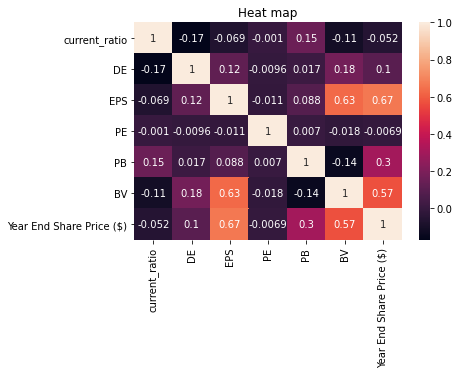

In [582]:
sns.heatmap(fin_asx200_clean[var_lists].corr(), annot=True)
plt.title("Heat map")

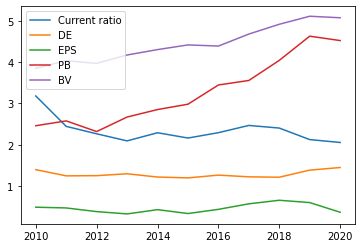

In [574]:
plt.plot(mean_current_ratio, label="Current ratio")
plt.plot(mean_DE, label="DE")
plt.plot(mean_EPS, label="EPS")
# plt.plot(mean_PE, label="PE")
plt.plot(mean_PB, label="PB")
plt.plot(mean_BV, label="BV")

plt.legend()

(array([1.386e+03, 2.610e+02, 9.500e+01, 4.800e+01, 2.800e+01, 9.000e+00,
        3.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.17436308,  3.691518  ,  7.208673  , 10.725828  , 14.242983  ,
        17.760138  , 21.277294  , 24.794449  , 28.311604  , 31.828758  ,
        35.345913  , 38.863068  , 42.380222  , 45.897377  , 49.41453   ,
        52.93169   , 56.448845  , 59.966     , 63.483154  , 67.000305  ,
        70.51746   ], dtype=float32),
 <BarContainer object of 20 artists>)

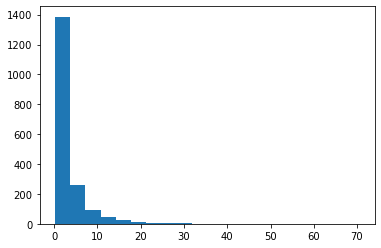

In [570]:
plt.hist(fin_asx200_clean['PB'], bins=20)

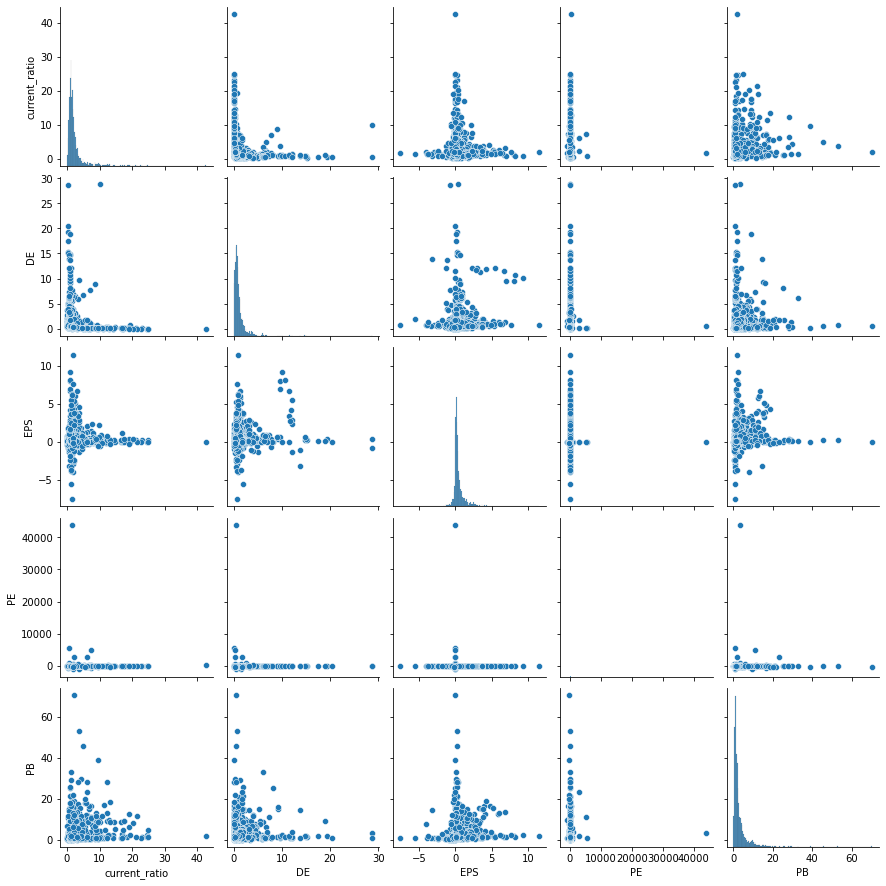

In [537]:
sns.pairplot(fin_asx200_clean[var_lists])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Consumer Staples'),
  Text(1, 0, 'Materials'),
  Text(2, 0, 'Real Estate'),
  Text(3, 0, 'Utilities'),
  Text(4, 0, 'Consumer Discretionary'),
  Text(5, 0, 'Industrials'),
  Text(6, 0, 'Information Technology'),
  Text(7, 0, 'Financials'),
  Text(8, 0, 'Health Care'),
  Text(9, 0, 'Energy'),
  Text(10, 0, 'Communication Services')])

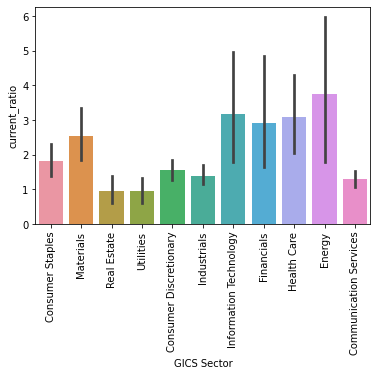

In [518]:
sns.barplot(x="GICS Sector", y="current_ratio", data=year_2015)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Consumer Staples'),
  Text(1, 0, 'Materials'),
  Text(2, 0, 'Real Estate'),
  Text(3, 0, 'Utilities'),
  Text(4, 0, 'Consumer Discretionary'),
  Text(5, 0, 'Industrials'),
  Text(6, 0, 'Information Technology'),
  Text(7, 0, 'Financials'),
  Text(8, 0, 'Health Care'),
  Text(9, 0, 'Energy'),
  Text(10, 0, 'Communication Services')])

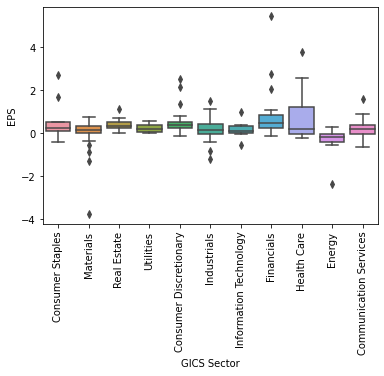

In [524]:
sns.boxplot(x="GICS Sector", y="EPS", data=year_2015)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='EPS', ylabel='Year End Share Price ($)'>

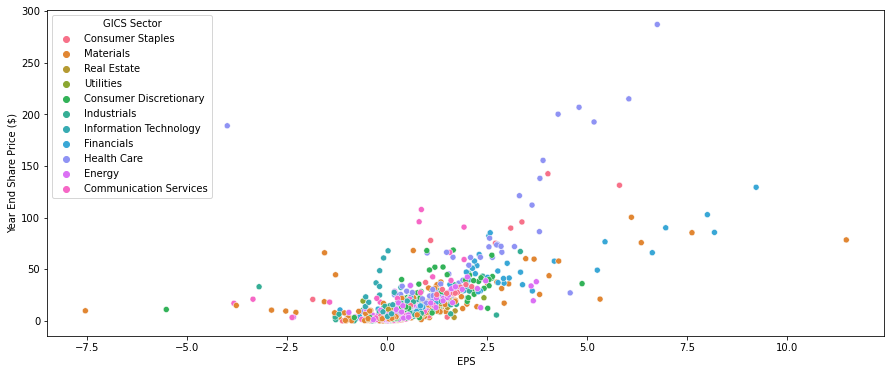

In [578]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=fin_asx200_clean, x='EPS', y='Year End Share Price ($)',hue='GICS Sector')


<Figure size 1080x432 with 0 Axes>

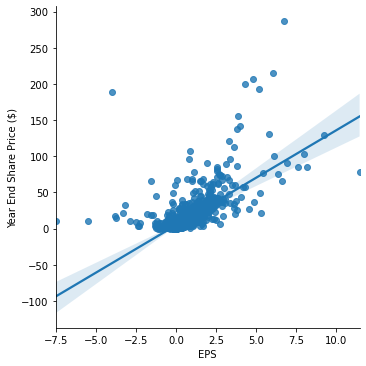

In [526]:
plt.figure(figsize=(15,6))
sns.lmplot(data=fin_asx200_clean, x='EPS', y='Year End Share Price ($)')

# Value investing criteria

In [531]:
# value investing criteria
# 1. Current ratio >= 1.5
fin_asx200_clean['criteria_1'] = fin_asx200_clean['current_ratio']>=1.5
# 2. Debt to Equity ratio < 0.5
fin_asx200_clean['criteria_2'] = fin_asx200_clean['DE']<0.5
# 3. Earnings per share has been increasing over the past 3 years
# increase from the previous year
fin_asx200_clean['EPS_up_t-1'] = fin_asx200_clean['EPS']>fin_asx200_clean.groupby('ASX Code')['EPS'].shift(1)
fin_asx200_clean['EPS_up_t-2'] = fin_asx200_clean['EPS']>fin_asx200_clean.groupby('ASX Code')['EPS'].shift(2)
# fin_asx200_clean['EPS_up_t-3'] = fin_asx200_clean['EPS']>fin_asx200_clean.groupby('ASX Code')['EPS'].shift(3)
# fin_asx200_clean['EPS_up_t-4'] = fin_asx200_clean['EPS']>fin_asx200_clean.groupby('ASX Code')['EPS'].shift(4)
fin_asx200_clean['criteria_3'] = ((fin_asx200_clean['EPS_up_t-1']==True) &
                                 (fin_asx200_clean['EPS_up_t-2']==True) )
# 4. Price to earnings ratio < 15
# (P/E - based on the average earnings of the past threee years)
fin_asx200_clean['EPS_t-1'] = fin_asx200_clean.groupby('ASX Code')['EPS'].shift(1) 
fin_asx200_clean['EPS_t-2'] = fin_asx200_clean.groupby('ASX Code')['EPS'].shift(2) 
fin_asx200_clean['EPS_3yr'] = (fin_asx200_clean['EPS'] + fin_asx200_clean['EPS_t-1'] + fin_asx200_clean['EPS_t-2'])/3
fin_asx200_clean['criteria_4'] = (fin_asx200_clean['PE']/fin_asx200_clean['EPS_3yr']) < 15

# 5. Price to Book value per share < 1.5
fin_asx200_clean['criteria_5'] = fin_asx200_clean['PB']<1.5


In [532]:
selected_firms = fin_asx200_clean.loc[(fin_asx200_clean['criteria_1']==True) &
                    (fin_asx200_clean['criteria_2']==True) &
                    (fin_asx200_clean['criteria_3']==True) &
                    (fin_asx200_clean['criteria_4']==True) &
                    (fin_asx200_clean['criteria_5']==True)]


In [533]:
selected_firms['year'].value_counts().sort_index()

2012    1
2013    2
2014    2
2015    5
2016    1
2017    5
2018    1
2020    1
Name: year, dtype: int64

In [631]:
selected_firms.loc[selected_firms['year']==2015]['ASX Code']

1847    SOL
Name: ASX Code, dtype: object

In [593]:
selected_firms.loc[selected_firms['year']==2015]['GICS Sector'].value_counts()

Materials      4
Industrials    1
Name: GICS Sector, dtype: int64

In [632]:
selected_firms_lists = {"year2012":['COE'],
                        "year2013":['ORE','PMV'],
                        "year2014":['IGO','SGM'],
                        "year2015":['EVN','OZL','SAR','SGM','SSM'],
                        "year2016":['SLR'],
                        "year2017":['BKW','BPT','JHG','S32','SOL'],
                        "year2018":['WPL']}
selected_firms_lists

{'year2012': ['COE'],
 'year2013': ['ORE', 'PMV'],
 'year2014': ['IGO', 'SGM'],
 'year2015': ['EVN', 'OZL', 'SAR', 'SGM', 'SSM'],
 'year2016': ['SLR'],
 'year2017': ['BKW', 'BPT', 'JHG', 'S32', 'SOL'],
 'year2018': ['WPL']}

# Visualisation

In [ ]:
fin_asx200_clean['current_ratio']
fin_asx200_clean['DE']
fin_asx200_clean['EPS']
fin_asx200_clean['EPS_3yr']
fin_asx200_clean['PE']
fin_asx200_clean['PB']

In [633]:
firm_2015_lists = ['EVN', 'OZL', 'SAR', 'SGM', 'SSM']

# Stock price from yahoo finance

In [610]:
start = '2015-01-01'
end = date.today()

In [635]:
STW = web.DataReader('STW.AX','yahoo',start,end)
# 2012
COE = web.DataReader('COE.AX','yahoo',start,end)
# 2013
ORE = web.DataReader('ORE.AX','yahoo',start,end)
PMV = web.DataReader('PMV.AX','yahoo',start,end)
# 2014
IGO = web.DataReader('IGO.AX','yahoo',start,end)
SGM = web.DataReader('SGM.AX','yahoo',start,end)
# 2015
EVN = web.DataReader('EVN.AX','yahoo',start,end)
OZL = web.DataReader('OZL.AX','yahoo',start,end)
SAR = web.DataReader('SAR.AX','yahoo',start,end)
SGM = web.DataReader('SGM.AX','yahoo',start,end)
SSM = web.DataReader('SSM.AX','yahoo',start,end)
# 2016
SLR = web.DataReader('SLR.AX','yahoo',start,end)
# 2017
BKW = web.DataReader('BKW.AX','yahoo',start,end)
BPT = web.DataReader('BPT.AX','yahoo',start,end)
JHG = web.DataReader('JHG.AX','yahoo',start,end)
S32 = web.DataReader('S32.AX','yahoo',start,end)
SOL = web.DataReader('SOL.AX','yahoo',start,end)
# 2018
WPL = web.DataReader('WPL.AX','yahoo',start,end)



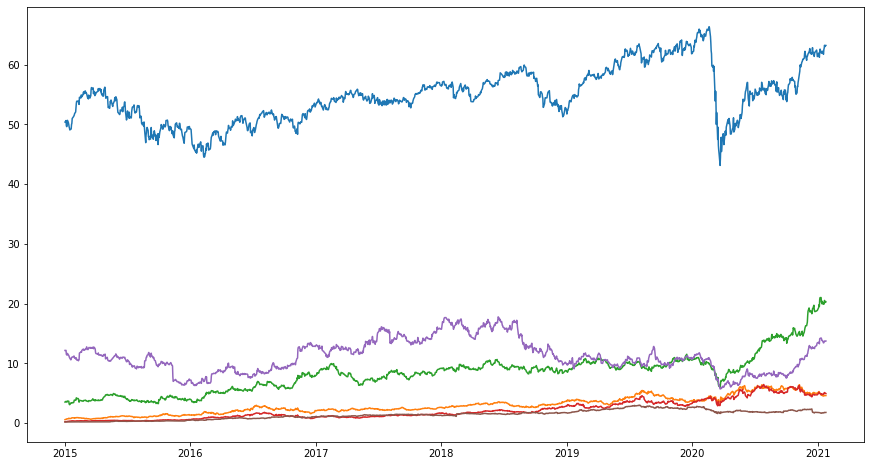

In [612]:
plt.figure(figsize=(15,8))
plt.plot(STW['Close'])
plt.plot(EVN['Close'])
plt.plot(OZL['Close'])
plt.plot(SAR['Close'])
plt.plot(SGM['Close'])
plt.plot(SSM['Close'])


In [652]:
# Daily percentage change
# cumulative returns
for df in (STW, COE, ORE, PMV, IGO, SGM, EVN, OZL, SAR, SGM, SSM, SLR, BKW, BPT, JHG, S32, SOL, WPL):
    
    # Daily percentage change
    df['returns'] = (df['Close']/df['Close'].shift(1))-1
    
    # cumulative returns
    df['cumulative return'] = (1 + df['returns']).cumprod()


# COE['returns'] = (COE['Close']/COE['Close'].shift(1))-1
# ORE['returns'] = (ORE['Close']/ORE['Close'].shift(1))-1
# PMV['returns'] = (PMV['Close']/PMV['Close'].shift(1))-1
# IGO['returns'] = (IGO['Close']/IGO['Close'].shift(1))-1
# SGM['returns'] = (SGM['Close']/SGM['Close'].shift(1))-1

# EVN['returns'] = (EVN['Close']/EVN['Close'].shift(1))-1
# OZL['returns'] = (OZL['Close']/OZL['Close'].shift(1))-1
# SAR['returns'] = (SAR['Close']/SAR['Close'].shift(1))-1
# SGM['returns'] = (SGM['Close']/SGM['Close'].shift(1))-1
# SSM['returns'] = (SSM['Close']/SSM['Close'].shift(1))-1


In [654]:
equal_port_ret_2015 = (EVN['returns']+OZL['returns']+SAR['returns']+SGM['returns']+SSM['returns'])/5
equal_port_ret_2015

Date
2015-01-01         NaN
2015-01-04    0.040714
2015-01-05    0.005348
2015-01-06    0.015638
2015-01-07   -0.002823
                ...   
2021-01-18    0.012223
2021-01-19    0.013863
2021-01-20    0.012813
2021-01-21   -0.011776
2021-01-24    0.000129
Name: returns, Length: 1537, dtype: float64

In [668]:
selected_firms_lists

{'year2012': ['COE'],
 'year2013': ['ORE', 'PMV'],
 'year2014': ['IGO', 'SGM'],
 'year2015': ['EVN', 'OZL', 'SAR', 'SGM', 'SSM'],
 'year2016': ['SLR'],
 'year2017': ['BKW', 'BPT', 'JHG', 'S32', 'SOL'],
 'year2018': ['WPL']}

In [672]:
# 2012
equal_port_cum_ret_2012 = (COE['cumulative return'])
# 2013
equal_port_cum_ret_2013 = (ORE['cumulative return']+PMV['cumulative return'])/2
# 2014
equal_port_cum_ret_2014 = (IGO['cumulative return']+SGM['cumulative return'])/2
# 2015
equal_port_cum_ret_2015 = (EVN['cumulative return']+OZL['cumulative return']+SAR['cumulative return']+SGM['cumulative return']+SSM['cumulative return'])/5
# 2016
equal_port_cum_ret_2016 = (SLR['cumulative return'])
# 2017
equal_port_cum_ret_2017 = (BKW['cumulative return']+BPT['cumulative return']+JHG['cumulative return']+S32['cumulative return']+SOL['cumulative return'])/5
# 2018
equal_port_cum_ret_2018 = (WPL['cumulative return'])


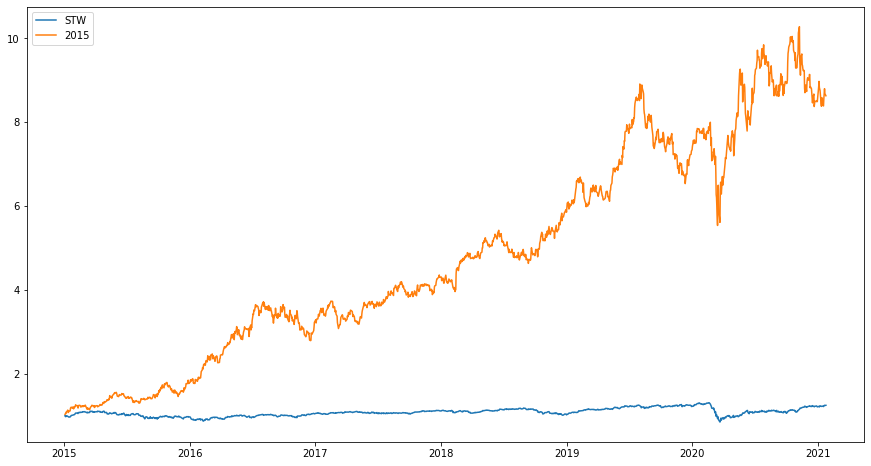

In [687]:
plt.figure(figsize=(15,8))
plt.plot(STW['cumulative return'], label='STW')
# plt.plot(equal_port_cum_ret_2012, label='2012')
# plt.plot(equal_port_cum_ret_2013, label='2013')
# plt.plot(equal_port_cum_ret_2014, label='2014')
plt.plot(equal_port_cum_ret_2015, label='2015')
# plt.plot(equal_port_cum_ret_2016, label='2016')
# plt.plot(equal_port_cum_ret_2017, label='2017')
# plt.plot(equal_port_cum_ret_2018, label='2018')

plt.legend()


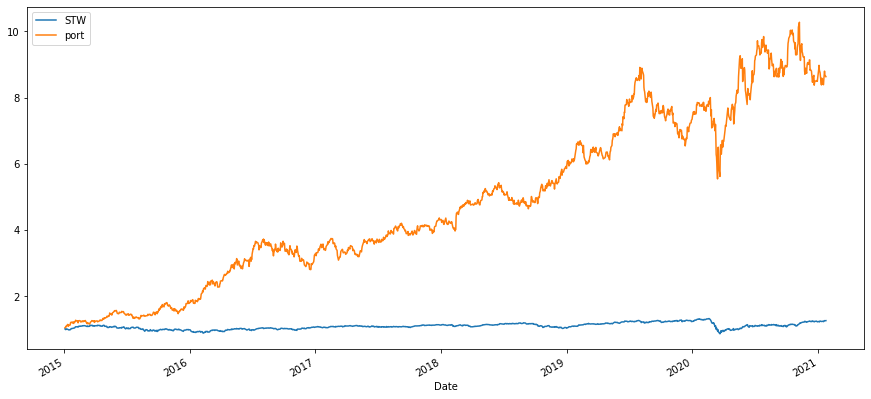

In [655]:
STW['cumulative return'].plot(label='STW', figsize=(15,7))
# Eequal_port_cum_ret_2015cumulative return'].plot(label='SSM')
equal_port_cum_ret_2015.plot(label='port')

plt.legend()


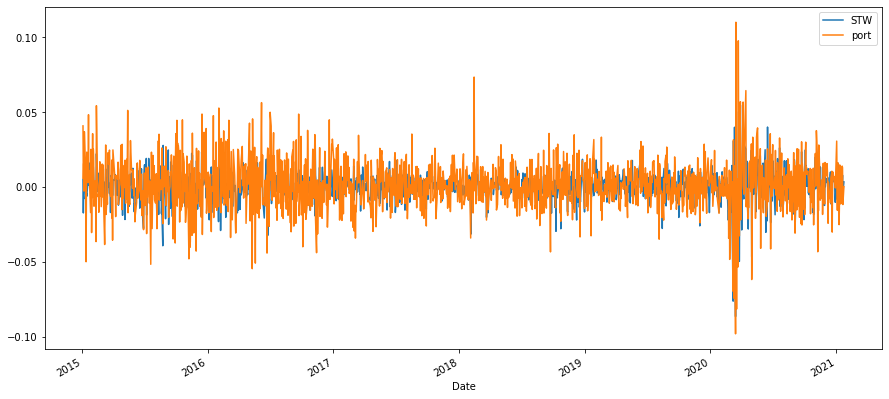

In [618]:
STW['returns'].plot(label='STW', figsize=(15,7))
# Eequal_port_cum_ret_2015cumulative return'].plot(label='SSM')
equal_port_ret_2015.plot(label='port')

plt.legend()


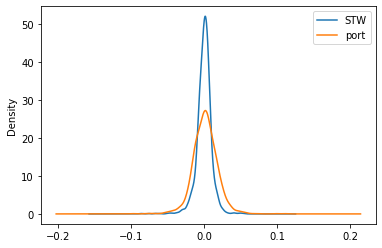

In [619]:
STW['returns'].plot(kind='kde', label='STW')
equal_port_ret_2015.plot(kind='kde', label='port')
plt.legend()